In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
# M: 悪性 B: 良性
le.transform(['M', 'B'])

array([1, 0])

In [15]:
le.classes_

array(['B', 'M'], dtype=object)

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [21]:
pipe_lr = Pipeline([('sc1', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])

In [22]:
pipe_lr

Pipeline(memory=None,
     steps=[('sc1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [23]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('sc1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [24]:
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


## Cross Validation

In [25]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

In [44]:
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

In [45]:
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist: %s, Acc: %.3f' % (k + 1, np.bincount(y_train[train]), score))

Fold: 1, Class dist: [256 153], Acc: 0.891
Fold: 2, Class dist: [256 153], Acc: 0.978
Fold: 3, Class dist: [256 153], Acc: 0.978
Fold: 4, Class dist: [256 153], Acc: 0.913
Fold: 5, Class dist: [256 153], Acc: 0.935
Fold: 6, Class dist: [257 153], Acc: 0.978
Fold: 7, Class dist: [257 153], Acc: 0.933
Fold: 8, Class dist: [257 153], Acc: 0.956
Fold: 9, Class dist: [257 153], Acc: 0.978
Fold: 10, Class dist: [257 153], Acc: 0.956


In [46]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.029


In [50]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)

In [51]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.89130435 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556]


In [52]:
print('CV accuracy: %.3f +- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +- 0.029


## learning curve

In [67]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
%matplotlib inline

In [54]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])

In [57]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)

In [58]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

In [63]:
train_scores

array([[1.        , 0.975     , 0.975     , 0.975     , 0.975     ,
        0.975     , 0.975     , 0.975     , 0.975     , 0.975     ],
       [1.        , 0.98765432, 0.98765432, 0.98765432, 0.98765432,
        0.98765432, 0.98765432, 0.98765432, 0.98765432, 0.98765432],
       [0.99180328, 0.98360656, 0.99180328, 0.99180328, 0.99180328,
        0.99180328, 0.99180328, 0.99180328, 0.99180328, 0.99180328],
       [0.99386503, 0.98773006, 0.98773006, 0.99386503, 0.98773006,
        0.98773006, 0.98773006, 0.98773006, 0.98773006, 0.98773006],
       [0.99509804, 0.99019608, 0.99019608, 0.99509804, 0.99019608,
        0.99019608, 0.99019608, 0.99019608, 0.99019608, 0.99019608],
       [0.99183673, 0.9877551 , 0.99183673, 0.99183673, 0.99183673,
        0.99183673, 0.99183673, 0.99183673, 0.99183673, 0.99183673],
       [0.99300699, 0.99300699, 0.99300699, 0.99300699, 0.99300699,
        0.99300699, 0.99300699, 0.99300699, 0.99300699, 0.99300699],
       [0.99082569, 0.98776758, 0.9908256

In [64]:
test_scores

array([[0.93478261, 0.93478261, 0.95652174, 0.86956522, 1.        ,
        0.97777778, 0.93333333, 0.93333333, 0.97777778, 0.95555556],
       [0.93478261, 1.        , 0.95652174, 0.93478261, 1.        ,
        0.95555556, 0.95555556, 0.97777778, 1.        , 0.95555556],
       [0.93478261, 0.97826087, 1.        , 0.95652174, 0.97826087,
        0.95555556, 0.95555556, 0.97777778, 1.        , 0.93333333],
       [0.93478261, 0.97826087, 1.        , 0.97826087, 1.        ,
        0.95555556, 0.95555556, 0.97777778, 1.        , 0.95555556],
       [0.97826087, 0.97826087, 0.97826087, 0.95652174, 1.        ,
        0.95555556, 0.95555556, 0.97777778, 1.        , 0.95555556],
       [0.97826087, 0.97826087, 0.95652174, 0.97826087, 0.97826087,
        0.97777778, 0.95555556, 0.97777778, 1.        , 0.95555556],
       [0.95652174, 0.97826087, 0.97826087, 0.97826087, 1.        ,
        0.97777778, 1.        , 0.97777778, 1.        , 0.95555556],
       [0.93478261, 0.97826087, 0.9565217

In [65]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

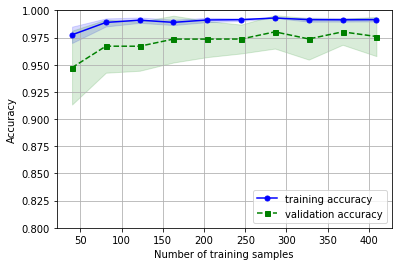

In [71]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [76]:
pipe_svc = Pipeline([('sc1', StandardScaler()),
                    ('clf', SVC(random_state=1))])

In [77]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('sc1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [78]:
y_pred = pipe_svc.predict(X_test)

In [80]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

In [81]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0])

In [82]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [83]:
print(confmat)

[[71  1]
 [ 2 40]]


Text(0,0.5,'true label')

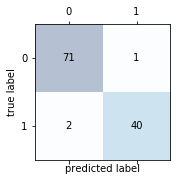

In [88]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [92]:
print('precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print(40 / 41)

precision: 0.976
0.975609756097561


In [95]:
print('recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print(40 / 42)

recall: 0.952
0.9523809523809523


In [97]:
print('f1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print(2 * 0.975609756097561 * 0.9523809523809523 / (0.975609756097561 + 0.9523809523809523))

f1: 0.964
0.963855421686747


## ROC curve

In [99]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [106]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])
X_train2 = X_train[:, [4, 14]]

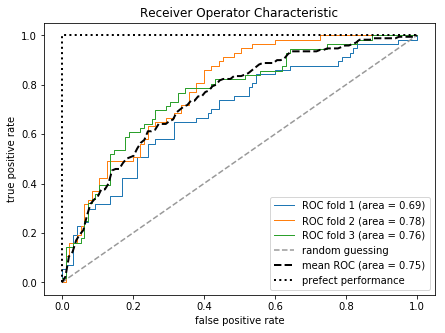

In [137]:
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

all_tpr = []
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i + 1, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='prefect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.show()

In [141]:
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4, 14]])
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % (roc_auc_score(y_true=y_test, y_score=y_pred2)))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711
